*This is a Jupyter Notebook. It is an interactive document that contains both rich text elements such as figures, links, equations, etc. and executable code (in this case Python code) contained in cells.
**Instructions:** You can run the notebook document step-by-step (execute one cell a time) by pressing shift + enter or
you can run the whole notebook in a single step by clicking on the menu Cell -> Run All.*

# What parameters are not important in our model?
In this Notebook we will apply Global Sensitivity Analysis (GSA) to identify the parameters in a model, if any, which have a negligible influence on the model results. In this way, we can reduce the number of parameters and hence the time and money that we need to invest to improve our model. In this example we will apply GSA to a simple hydrological model.

# But what is a hydrological model?
Imagine that we want to simulate the natural water flows draining into a river. Knowing the amount of rainfall that has fallen in the river drainage area, i.e. catchment, we can estimate how much of the rainwater flows over (surface flow) and under (subsurface flow) the land surface and finally reach the river. 

For this purpose, we can use a hydrological model. A hydrological model is a mathematical model (set of equations) describing the hydrological processes that occur in a catchment as a function of various parameters. These model parameters describe the hydrological characteristics of the catchment, such as the climate and soil characteristics, ultimately enabling the estimation of the river flow at selected river sections.

## Hydrological processes in a watershed
This animated image represents the main hydrological processes that occur in a watershed. 

<left><img src="util/rain_runoff_diagram8.gif" width="700px">
    
## Diagram of the hydrological model

This is how the hydrological model represents the hydrological processes to finally obtain the river flow. 

<left><img src="util/hymod_diagram_simple4.gif" width="1000px">

## Model parameters
To represent the hydrological processes the model use mathematical equations that are as a function of several parameters.

In our simple hydrological model we have 5 parameters (the model is a simplified adaptation of the HyMOD model *(Ref. 1)*):
- Soil storage capacity (mm): capacity of the soil to store rainwater
- Evaporation ratio: proportion of rainwater that is evaporated
- Infiltration rate: proportion of effective rain that actually infiltrates into the soil
- Travel time - surface flow (days): average time for the surface water to reach the river 
- Travel time - underground flow (days): average time for the underground water to reach the river

<left><img src="util/rain_runoff_param.png" width="500px">
    
To tailor a hydrological model to a particular watershed we need to know the value of the model parameters. Usually the value of the model parameters are unknown and ideally, to obtain a good representation of the hydrological processes occuring in the watershed, we should measure their values in-situ. However, this data is generally difficult and expensive to measure. 

Now imagine that have a very limited budget and we cannot measure the paramater values in-situ. In this case, when the parameter values are not available, model calibration is required.
    
## Calibration of the model parameters

Model calibration is the process of adjusting the model parameters to obtain a representation of the catchment under study that satisfies a pre-agreed criteria. Normally, calibration of a hydrological model aims to improve the fit of the simulated river flow to observed river flow and involves running the model many times under different combinations of the parameter values, until a combination is found that minimise the differences between simulated and observed flows. The process of calibration can be very time consuming and computationally intensive.

## One-at-a-time calibration

To have a better idea of that model calibration is let's try to calibrate the model manually, that is, changing the parameter values one-at-a-time and looking at the effects induced in the model resutls. Try to visually fit the simulated river flow to the observed one and reduce the calibration error by playing only with the parameters. The error is the sum of the absolute daily differeces between the simulated and the observed river flows.

In [1]:
from ipywidgets import widgets
from util.hydrological_model import hydrological_model

Soil_sto,Evap_rate,Inf_rate, Time_surf,Time_under,slider_box_layout,\
           fig_sto,fig_flo,fig_hyd,hbox_layout,vbox_layout,param_obs = hydrological_model()

widgets.VBox([widgets.VBox([Soil_sto,Evap_rate,Inf_rate, Time_surf,Time_under],layout=slider_box_layout),
              widgets.HBox([fig_sto,fig_flo,fig_hyd],layout=hbox_layout)],layout = vbox_layout)

We can see the complexity of one-at-a-time calibration: it is difficult to find the combination of parameters that optimally fits the simulated river flow to the observed one.

In order to facilitate the search for an optimal parameter combination we can apply Global Sensitivity Analysis (GSA). In this case, GSA can help to identify what parameters in our model have a relevant influence in the model results and what parameters can be neglected in the process of calibration.

## Plot sensitivity indices and identify non-influential parameters
By applying GSA *(Ref. 2)* we obtain a sensitivity index for each model parameter that measures the relative influence of the parameter on the calibration error. Being the influence lower as the sensitivity index decreases. With GSA we can also obtain an influence threshold value for the sensitivity index. If the index of a parameter is below the threshold, then the parameter can be considered as uninfluential *(Ref. 3)*. Now run the cell below to obtain the sensivity indices and the influence threshold (black dotted line).

In [2]:
from util.GSA_hydrological_model import screening, mapping

x1,x2,x3,x4,x5,fig1 = screening(param_obs)

widgets.VBox([fig1])

    'data': [{'line': {'color': 'rgba(120, 170, 150, 1)'},
              'mode':…

## Let's try to calibrate the model parameters again...
Now try to calibrate the hydrological model, i.e. minimize the calibration error, but now neglecting the parameters that according to GSA are not influential. We consider that we get a **good calibration when error <50 ML** and **very good when error <35 ML**. Are you able to get a **good** calibration by only **changing the value of 2 parameters**? and a **very good** calbration by only **changing the value of 3 parameters**?

In [3]:
Soil_sto,Evap_rate,Inf_rate, Time_surf,Time_under,slider_box_layout,\
           fig_sto,fig_flo,fig_hyd,hbox_layout,vbox_layout,param_obs = hydrological_model()

widgets.VBox([widgets.VBox([Soil_sto,Evap_rate,Inf_rate, Time_surf,Time_under],layout=slider_box_layout),
              widgets.HBox([fig_sto,fig_flo,fig_hyd],layout=hbox_layout)],layout = vbox_layout)

If you need additional help to find an optimal combination of parameter values we can use again GSA to compute multiple combinations of the influential parameters (dots) and obtain their corresponding calibration error (dot color). Note that the lower errors correspond to dark blue dots.

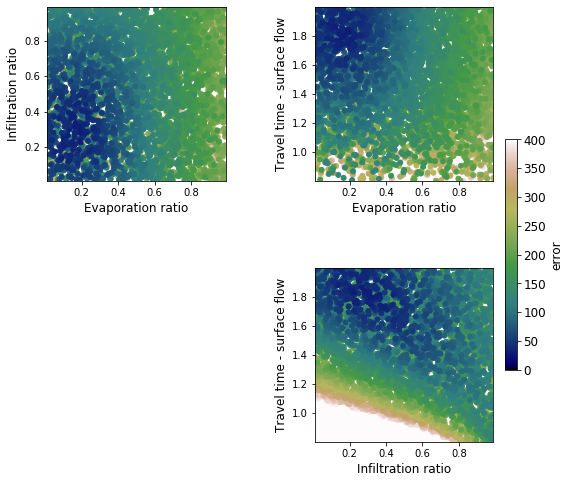

In [4]:
fig2 = mapping(param_obs,x1,x2,x3,x4,x5)

### References

1. [HyMOD model - Boyle (2003)](https://doi.org/10.1002/9781118665671.ch14)
2. [PAWN method - Pianosi and Wagener (2018)](https://doi.org/10.1016/j.envsoft.2018.07.019)
3. [Global Sensitivity Analysis . The primer - Saltelli et al. (2008)](http://www.andreasaltelli.eu/file/repository/A_Saltelli_Marco_Ratto_Terry_Andres_Francesca_Campolongo_Jessica_Cariboni_Debora_Gatelli_Michaela_Saisana_Stefano_Tarantola_Global_Sensitivity_Analysis_The_Primer_Wiley_Interscience_2008_.pdf) 